# Preparando os dados - ENEM 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100, 'display.float_format', lambda x: '%.2f' % x)
sns.set_theme(style = 'white', palette='bright')

In [2]:
raw_df = pd.read_csv("MICRODADOS_ENEM_2021.csv", delimiter = ';', encoding = 'ISO-8859-1')

In [3]:
raw_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.00,892.00,NaN,NaN,574.60,472.60,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.00,882.00,891.00,901.00,505.90,551.80,498.30,461.50,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,2304202.00,Crato,23.00,CE,2.00,1.00,1.00,2304202,Crato,23,CE,1,1,1,1,911.00,880.00,890.00,902.00,580.70,678.90,638.90,659.50,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,2311603.00,Redenção,23.00,CE,2.00,1.00,1.00,2300150,Acarape,23,CE,1,1,1,1,912.00,882.00,891.00,901.00,497.70,532.40,457.60,582.60,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [4]:
raw_df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

A coluna NU_ANO pode ser excluída, pois contém apenas um valor constante em todos os registros do conjunto de dados. Quanto às outras colunas, embora estejam associadas às notas dos alunos, a teoria de resposta ao item, usada pelo ENEM, estabelece essas relações ao atribuir as notas. Como não serão realizadas análises semelhantes que possam se beneficiar dessas informações, as colunas listadas abaixo serão excluídas do conjunto de dados.

In [5]:
dados = (raw_df
        .drop(columns = ['NU_ANO', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT',
                         'TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 'TX_GABARITO_MT']))
dados.duplicated().sum()

0

## Valores ausentes

In [6]:
def porcentagem_de_valores_NAN(df_):
    # A função retorna a porcentagem de valores ausentes
    n = df_.shape[0]
    NaN = df_.isna().sum()
    porcentagem_de_NaN = (NaN/n)*100
    return porcentagem_de_NaN[NaN>0]

In [7]:
porcentagem_de_valores_NAN(dados)

TP_ENSINO                67.64
CO_MUNICIPIO_ESC         75.99
NO_MUNICIPIO_ESC         75.99
CO_UF_ESC                75.99
SG_UF_ESC                75.99
TP_DEPENDENCIA_ADM_ESC   75.99
TP_LOCALIZACAO_ESC       75.99
TP_SIT_FUNC_ESC          75.99
NU_NOTA_CN               33.75
NU_NOTA_CH               29.84
NU_NOTA_LC               29.84
NU_NOTA_MT               33.75
TP_STATUS_REDACAO        29.84
NU_NOTA_COMP1            29.84
NU_NOTA_COMP2            29.84
NU_NOTA_COMP3            29.84
NU_NOTA_COMP4            29.84
NU_NOTA_COMP5            29.84
NU_NOTA_REDACAO          29.84
Q001                      0.00
Q002                      0.00
Q003                      0.00
Q004                      0.00
Q005                      0.00
Q006                      0.00
Q007                      0.00
Q008                      0.00
Q009                      0.00
Q010                      0.00
Q011                      0.00
Q012                      0.00
Q013                      0.00
Q014    

In [8]:
dados = dados.dropna(subset = ['Q001'])
porcentagem_de_valores_NAN(dados)

TP_ENSINO                67.64
CO_MUNICIPIO_ESC         75.99
NO_MUNICIPIO_ESC         75.99
CO_UF_ESC                75.99
SG_UF_ESC                75.99
TP_DEPENDENCIA_ADM_ESC   75.99
TP_LOCALIZACAO_ESC       75.99
TP_SIT_FUNC_ESC          75.99
NU_NOTA_CN               33.75
NU_NOTA_CH               29.84
NU_NOTA_LC               29.84
NU_NOTA_MT               33.75
TP_STATUS_REDACAO        29.84
NU_NOTA_COMP1            29.84
NU_NOTA_COMP2            29.84
NU_NOTA_COMP3            29.84
NU_NOTA_COMP4            29.84
NU_NOTA_COMP5            29.84
NU_NOTA_REDACAO          29.84
dtype: float64

Os dados ausentes das colunas de notas apresentam um padrão de recorrência. É razoável supor que aos participantes ausentes seja atribuído o valor NaN. Para testar essa hipótese, basta analisar a razão entre o número de participantes ausentes e o número de valores NaN. Além disso, é importante destacar que os participantes que recebem falta na prova de ciências humanas ('TP_PRESENCA_CH' = 0) não comparecem às provas de linguagem, códigos e redação. E os participantes eliminados satisfazem a condição ('TP_PRESENCA_CH' = 2).

In [9]:
print('Número de faltas na prova de ciências humanas:',dados[dados['TP_PRESENCA_CH'] == 0].shape[0])

Número de faltas na prova de ciências humanas: 1007396


In [10]:
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3',
         'NU_NOTA_COMP4','NU_NOTA_COMP5']
print("Números de valores NaN")
dados[notas].isna().sum()

Números de valores NaN


NU_NOTA_CN         1143987
NU_NOTA_CH         1011452
NU_NOTA_LC         1011452
NU_NOTA_MT         1143987
NU_NOTA_REDACAO    1011452
NU_NOTA_COMP1      1011452
NU_NOTA_COMP2      1011452
NU_NOTA_COMP3      1011452
NU_NOTA_COMP4      1011452
NU_NOTA_COMP5      1011452
dtype: int64

In [11]:
print("Razão entre os ausentes e valores NaN na prova de ciências humanas:                ",1007396/1011452)

print('Número de eliminados na prova de ciências humanas:                                 ', dados[dados.TP_PRESENCA_CH == 2]
      .shape[0])

print("Razão entre os (ausentes + eliminados) e valores NaN na prova de ciências humanas: ",((1007396 + 4056) /1011452))

Razão entre os ausentes e valores NaN na prova de ciências humanas:                 0.9959899233972547
Número de eliminados na prova de ciências humanas:                                  4056
Razão entre os (ausentes + eliminados) e valores NaN na prova de ciências humanas:  1.0


Nota-se que há uma relação um para um entres os valores NaN das notas e soma das ausências e eliminações no dia da prova de humanidades. Analogamente, o outro dia de prova. A princípio é possível atribuir zero aos valores NaN das colunas notas, no entanto, as notas são calculadas através da teoria de resposta ao item (TRI), isto é, os zeros nas notas não significa ausência de acertos, dessa forma não é inteligente substituir os valores NaN por zero. Dessa forma, os valores NaN serão excluídos.

In [12]:
dados = dados.dropna(subset=notas)

porcentagem_de_valores_NAN(dados)

TP_ENSINO                62.96
CO_MUNICIPIO_ESC         73.08
NO_MUNICIPIO_ESC         73.08
CO_UF_ESC                73.08
SG_UF_ESC                73.08
TP_DEPENDENCIA_ADM_ESC   73.08
TP_LOCALIZACAO_ESC       73.08
TP_SIT_FUNC_ESC          73.08
dtype: float64

Nota-se novamente um padrão nas porcentagens das colunas sobre as escolas que os participantes estudaram, indicando uma possível relação entre esses dados. As colunas de códigos (CO_...) possuem valores únicos, o que torna possível obter uma matriz de correlação entre elas. Além disso, as colunas que indicam os locais das provas estão completas e podem ser úteis para substituições.

In [13]:
loc_escola_loc_prova = ['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
                        'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA','SG_UF_PROVA']
matriz_corr = dados[loc_escola_loc_prova].corr()
matriz_corr

,CO_MUNICIPIO_ESC,CO_UF_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA
CO_MUNICIPIO_ESC,1.00,1.00,1.00,0.99
CO_UF_ESC,1.00,1.00,0.99,1.00
CO_MUNICIPIO_PROVA,1.00,0.99,1.00,1.00
CO_UF_PROVA,0.99,1.00,1.00,1.00


Assim, devido à forte correlação, as únicas colunas que serão usadas para localização são 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA' e 'SG_UF_PROVA'.

In [14]:
dados =(
  dados
 .drop(columns = loc_escola_loc_prova[:5])
 .rename(columns = {'NO_MUNICIPIO_PROVA':'NO_MUNICIPIO','CO_UF_PROVA':'CO_UF','SG_UF_PROVA':'SG_UF'}) 
)

### Análise explorátoria usandos o conjunto de dados reduzido sobre as escolas dos parcipantes
- Objetivo: Entender melhor esses dados e saber como lidar com os valores ausentes.

Os valores ausentes nas colunas sobre a Dependência administrativa (Escola), Ensino, Localização (Escola) e Situação de funcionamento (Escola) são significativos, e não há tratamento imediato. No entanto, o tamanho da amostra disponível ainda é expressivo, permitindo a exclusão dos valores ausentes para análises. Assim, ainda teremos um conjunto de dados com 592189 participantes. Esse novo conjunto de dados será chamado de 'dados_reduzido'.


In [15]:
porcentagem_de_valores_NAN(dados)

TP_ENSINO                62.96
TP_DEPENDENCIA_ADM_ESC   73.08
TP_LOCALIZACAO_ESC       73.08
TP_SIT_FUNC_ESC          73.08
dtype: float64

In [16]:
dados_reduzido = dados.dropna().copy()

porcentagem_de_valores_NAN(dados_reduzido) , dados_reduzido.shape[0]

(Series([], dtype: float64), 592189)

In [17]:
dados_reduzido['TP_DEPENDENCIA_ADM_ESC'] = dados_reduzido['TP_DEPENDENCIA_ADM_ESC'].map({1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada'})
dados_reduzido['TP_LOCALIZACAO_ESC'] = dados_reduzido['TP_LOCALIZACAO_ESC'].map({1 : 'Urbana', 2 : 'Rural'})
dados_reduzido['TP_SIT_FUNC_ESC'] = dados_reduzido['TP_SIT_FUNC_ESC'].map({1:'Em atividade', 2:'Paralisada', 3:'Extinta', 4:'Escola extinta em anos anteriores.'})
dados_reduzido['TP_ENSINO'] = dados_reduzido['TP_ENSINO'].map({1 : 'Ensino Regular', 2 : 'Educação Especial - Modalidade Substitutiva'})

In [18]:
dados_reduzido.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO,CO_UF,SG_UF,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,210052128335,3,M,1,3,1,2,0,2,Ensino Regular,0,Estadual,Urbana,Em atividade,Crato,23,CE,1,1,1,1,580.70,678.90,638.90,659.50,0,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2,F,1,3,1,2,0,2,Ensino Regular,0,Estadual,Urbana,Em atividade,Acarape,23,CE,1,1,1,1,497.70,532.40,457.60,582.60,1,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
33,210053085526,3,M,1,1,1,2,0,2,Ensino Regular,0,Estadual,Urbana,Em atividade,Urandi,29,BA,1,1,1,1,414.60,410.10,386.70,423.00,0,1.00,120.00,180.00,140.00,160.00,100.00,700.00,C,C,A,A,6.00,B,A,C,C,B,B,B,B,A,A,A,A,A,B,A,A,C,A,B,B
45,210052916275,4,F,1,3,1,2,0,2,Ensino Regular,0,Federal,Urbana,Em atividade,Pinheiros,32,ES,1,1,1,1,476.80,608.50,534.20,570.20,1,1.00,120.00,160.00,120.00,120.00,120.00,640.00,H,E,B,B,4.00,C,A,C,C,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B
51,210051417174,3,M,1,3,1,2,0,2,Ensino Regular,0,Estadual,Urbana,Em atividade,São Mateus,32,ES,1,1,1,1,433.40,622.00,548.30,579.40,1,1.00,120.00,120.00,160.00,140.00,140.00,680.00,E,F,D,D,4.00,D,A,C,D,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B


In [19]:
(dados_reduzido
 .groupby('TP_DEPENDENCIA_ADM_ESC')[notas[:5]]
 .describe().drop([('25%'), ('50%'), ('75%')], axis=1, level=1)
 # .mean()
 # .std()
 # .var()
#  .median()
 # .agg(lambda x: x.mode()[0])
#  .quantile(0.01)
#  .skew()
 # .sort_values(notas[:5], ascending = False)
 # .plot().legend(fontsize='x-small', loc ='best')
)

NU_NOTA_CN                            NU_NOTA_CH  \
                            count   mean   std    min    max      count   
TP_DEPENDENCIA_ADM_ESC                                                    
Estadual                351763.00 464.51 65.73   0.00 819.50  351763.00   
Federal                  40792.00 531.97 77.54   0.00 848.70   40792.00   
Municipal                 4662.00 477.26 71.91 340.30 758.10    4662.00   
Privada                 194972.00 538.88 82.61   0.00 844.50  194972.00   

                                                NU_NOTA_LC               \
                         mean   std  min    max      count   mean   std   
TP_DEPENDENCIA_ADM_ESC                                                    
Estadual               493.42 82.70 0.00 846.90  351763.00 481.65 70.42   
Federal                567.66 88.09 0.00 832.50   40792.00 543.82 68.67   
Municipal              508.09 85.60 0.00 766.70    4662.00 494.22 74.15   
Privada                567.57 89.49 0.00 846.90  194972.00 546.11 69.86   

                                     NU_NOTA_MT                              \
                          min    max      count   mean    std    min    max   
TP_DEPENDENCIA_ADM_ESC                                                        
Estadual                 0.00 759.10  351763.00 503.48  90.32   0.00 953.10   
Federal                  0.00 820.50   40792.00 599.90 111.18   0.00 953.10   
Municipal              298.00 729.60    4662.00 524.01  98.42 314.30 916.70   
Privada                  0.00 799.30  194972.00 607.73 113.61   0.00 953.10   

                       NU_NOTA_REDACAO                             
                                 count   mean    std  min     max  
TP_DEPENDENCIA_ADM_ESC                                             
Estadual                     351763.00 565.62 183.97 0.00  980.00  
Federal                       40792.00 701.25 162.97 0.00  980.00  
Municipal                      4662.00 583.61 175.97 0.00  980.00  
Privada                      194972.00 731.40 153.53 0.00 1000.00

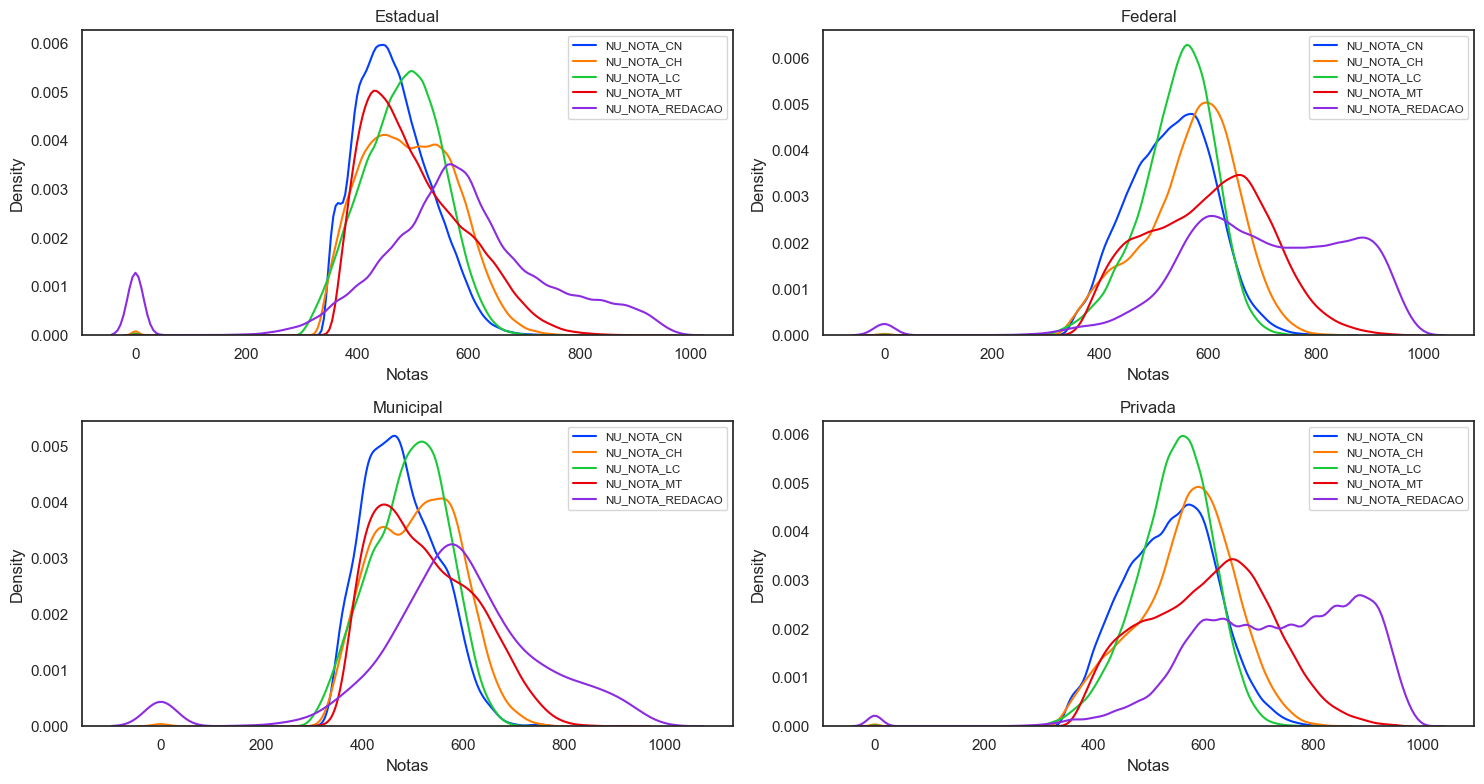

In [20]:
group_dependencia = dados_reduzido.groupby('TP_DEPENDENCIA_ADM_ESC')[notas[:5]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

for (name, group), ax in zip(group_dependencia, axes.flatten()):
    for col in group.columns:
        sns.kdeplot(group[col], ax=ax, label=col)
        ax.set_xlabel('Notas')
    ax.set_title(name)
    ax.legend(fontsize='x-small')
    

plt.tight_layout()
plt.show()

As distribuições das notas dos alunos de escolas privadas e federais têm um comportamento um pouco destoante das escolas municipais e estaduais. As escolas privadas e federais apresentam um desvio padrão maior em relação à média da amostra. Analisando a densidade de distribuição das notas, observa-se que algumas curvas não descrevem uma distribuição normal, o que seria esperado dada a natureza dos dados, em particular, as curvas para as notas em matemática e redação. Já as outras formas de administração escolar descrevem distribuições mais simétricas e centradas em torno da média.

É possível levantar duas hipóteses: existem diferenças significativas entre as escolas federais e entre as escolas particulares, ou essas diferenças estão entre os alunos de cada tipo de escola. A última explicação pode ser descartada, pois, se fosse verdade, essa discriminação apareceria nas escolas estaduais e municipais. A outra hipótese é mais sólida, já que há uma vasta gama de diferentes métodos de ensino, didáticas e suportes tecnológicos que as escolas particulares e federais possuem, mas tudo isso pode ser consequência de sub-representação. 

Os pontos que estão fora das curvas são os zeros, e devem ser excluídos para evitar a distorção nas análises estatísticas e na interpretação dos resultados. A presença de muitos zeros pode afetar as distribuições e médias das notas, por isso é importante removê-los. As demais colunas serão analisadas juntamente com a nota da redação, uma vez que ela tem um comportamento mais destoante em relação às outras notas.

Text(0.5, 0, 'Notas redação')

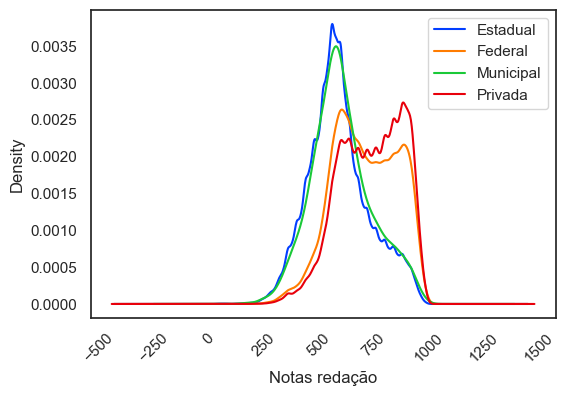

In [48]:
mask = (dados_reduzido[notas[:5]] == 0).any(axis=1)
dados_reduzido =  dados_reduzido[~mask]

dados_reduzido.groupby('TP_DEPENDENCIA_ADM_ESC')[notas[4]].plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
plt.xlabel('Notas redação')

De fato, há um caráter bimodal para as escolas privadas e federais. Além disso, suas curvas estão desviadas para o extremo superior, o que permite inferir que as escolas particulares e federais possuem alunos que obtêm notas mais altas em redação.

In [22]:
(dados_reduzido
 .groupby('TP_LOCALIZACAO_ESC')[notas[:5]]
 .describe().drop([('count'), ('25%'), ('50%'), ('75%')], axis=1, level=1)
 # .mean()
 # .median()
 # .agg(lambda x: x.mode()[0])
#  .quantile(0.01)
#  .skew()
 # .sort_values(notas[:5], ascending = False)
 # .plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
 # .plot(kind ='bar').legend(fontsize='x-small', loc ='best')
)

NU_NOTA_CN                     NU_NOTA_CH               \
                         mean   std    min    max       mean   std    min   
TP_LOCALIZACAO_ESC                                                          
Rural                  474.02 71.62 335.50 773.10     497.57 85.28 328.90   
Urbana                 496.40 80.82 312.30 848.70     526.97 90.73 324.50   

                          NU_NOTA_LC                     NU_NOTA_MT         \
                      max       mean   std    min    max       mean    std   
TP_LOCALIZACAO_ESC                                                           
Rural              832.30     480.22 73.93 298.90 746.70     510.17  97.96   
Urbana             846.90     510.78 75.02 298.00 820.50     548.53 112.08   

                                 NU_NOTA_REDACAO                       
                      min    max            mean    std   min     max  
TP_LOCALIZACAO_ESC                                                     
Rural              336.50 888.30          600.85 151.80 40.00  980.00  
Urbana             311.80 953.10          651.33 155.63 40.00 1000.00

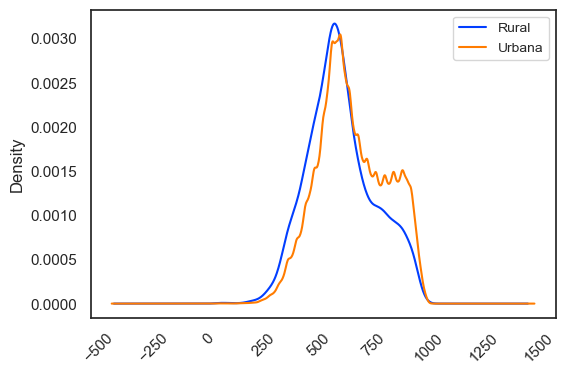

In [23]:
dados_reduzido.groupby('TP_LOCALIZACAO_ESC')[notas[4]].plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
plt.legend(fontsize = 'small')
plt.xlabel('Notas redação')

Não há diferenças significativas entres escolas rurais e ubarnas.

In [24]:
(dados_reduzido
 .groupby('TP_SIT_FUNC_ESC')[notas[:5]]
 .describe().drop([('count'), ('25%'), ('50%'), ('75%')], axis=1, level=1)
 # .mean()
 # .median()
 # .agg(lambda x: x.mode()[0])
#  .quantile(0.01)
#  .skew()
 # .sort_values(notas[:5], ascending = False)
 # .plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
 # .plot()
)

NU_NOTA_CN                     NU_NOTA_CH  \
                                         mean   std    min    max       mean   
TP_SIT_FUNC_ESC                                                                
Em atividade                           495.63 80.62 312.30 848.70     525.97   
Escola extinta em anos anteriores.     501.59 80.95 340.80 788.20     532.26   
Extinta                                543.89 88.88 348.40 777.30     580.19   
Paralisada                             506.84 80.97 342.90 783.10     540.27   

                                                       NU_NOTA_LC        \
                                     std    min    max       mean   std   
TP_SIT_FUNC_ESC                                                           
Em atividade                       90.68 324.50 846.90     509.78 75.15   
Escola extinta em anos anteriores. 91.27 337.50 804.30     513.66 75.44   
Extinta                            94.50 338.90 800.40     550.02 77.99   
Paralisada                         90.46 336.40 816.10     518.44 74.65   

                                                 NU_NOTA_MT                \
                                      min    max       mean    std    min   
TP_SIT_FUNC_ESC                                                             
Em atividade                       298.00 820.50     547.23 111.84 311.80   
Escola extinta em anos anteriores. 308.50 710.50     556.09 112.84 314.30   
Extinta                            319.00 728.70     607.86 114.04 362.40   
Paralisada                         307.10 759.40     568.66 112.04 312.90   

                                          NU_NOTA_REDACAO                \
                                      max            mean    std    min   
TP_SIT_FUNC_ESC                                                           
Em atividade                       953.10          649.55 155.71  40.00   
Escola extinta em anos anteriores. 929.10          664.84 153.54 240.00   
Extinta                            865.00          745.08 148.71 240.00   
Paralisada                         916.00          690.63 158.65 160.00   

                                            
                                       max  
TP_SIT_FUNC_ESC                             
Em atividade                       1000.00  
Escola extinta em anos anteriores.  980.00  
Extinta                             980.00  
Paralisada                          980.00

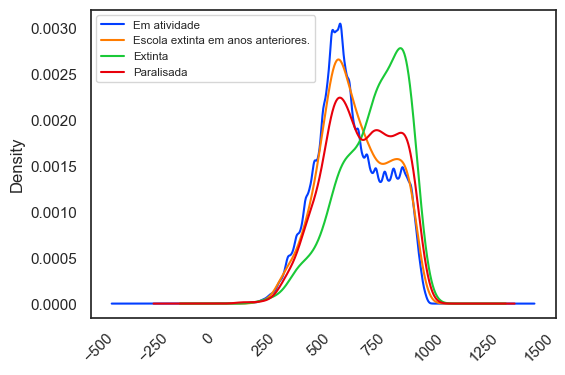

In [25]:
dados_reduzido.groupby('TP_SIT_FUNC_ESC')[notas[4]].plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
plt.legend(fontsize = 'x-small')
plt.xlabel('Notas redação')

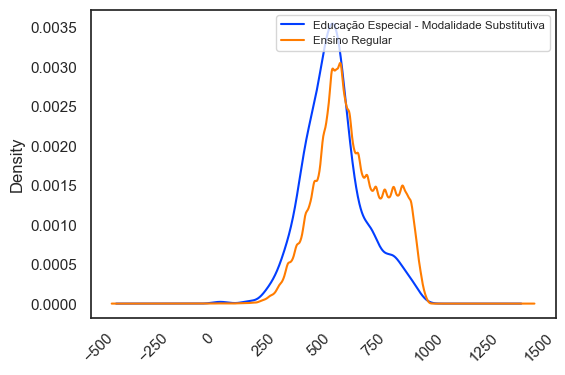

In [26]:
dados_reduzido.groupby('TP_ENSINO')[notas[4]].plot(kind ='kde', rot=45, figsize=(6,4), legend = True)
plt.legend(fontsize = 'x-small', loc = 'best')
plt.xlabel('Notas redação')

Portanto, nota-se que o funcionamento e tipo da administração da escola têm peso nas notas dos participantes, enquanto o tipo de ensino e a localização da escola não apresentam essa influência. No entanto, manter esses dados reduz significativamente o tamanho do conjunto de dados da população de participantes do ENEM 2021. Assim, eles serão excluídos, bem como os valores zero nas notas.

### Otimizando tamanho do conjunto de dados

Algumas colunas do conjunto de dados apresentaram variância igual a zero após o pré-processamento, e essas colunas serão excluídas.

In [27]:
dados.var(numeric_only= True)

NU_INSCRICAO             993884564902.64
TP_FAIXA_ETARIA                    12.51
TP_ESTADO_CIVIL                     0.13
TP_COR_RACA                         1.05
TP_NACIONALIDADE                    0.04
TP_ST_CONCLUSAO                     0.55
TP_ANO_CONCLUIU                    14.40
TP_ESCOLA                           0.41
TP_ENSINO                           0.00
IN_TREINEIRO                        0.14
TP_DEPENDENCIA_ADM_ESC              1.03
TP_LOCALIZACAO_ESC                  0.03
TP_SIT_FUNC_ESC                     0.04
CO_UF                              97.04
TP_PRESENCA_CN                      0.00
TP_PRESENCA_CH                      0.00
TP_PRESENCA_LC                      0.00
TP_PRESENCA_MT                      0.00
NU_NOTA_CN                       6480.21
NU_NOTA_CH                       8908.76
NU_NOTA_LC                       6099.15
NU_NOTA_MT                      12227.44
TP_LINGUA                           0.24
TP_STATUS_REDACAO                   0.51
NU_NOTA_COMP1   

In [28]:
mask = (dados[notas[:5]] == 0).any(axis=1)

df = (dados[~mask]
 .reset_index(drop = True)
 .drop(columns = ['TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','TP_ENSINO','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
                  'TP_STATUS_REDACAO'] )
)

porcentagem_de_valores_NAN(df)

Series([], dtype: float64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173531 entries, 0 to 2173530
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NU_INSCRICAO      int64  
 1   TP_FAIXA_ETARIA   int64  
 2   TP_SEXO           object 
 3   TP_ESTADO_CIVIL   int64  
 4   TP_COR_RACA       int64  
 5   TP_NACIONALIDADE  int64  
 6   TP_ST_CONCLUSAO   int64  
 7   TP_ANO_CONCLUIU   int64  
 8   TP_ESCOLA         int64  
 9   IN_TREINEIRO      int64  
 10  NO_MUNICIPIO      object 
 11  CO_UF             int64  
 12  SG_UF             object 
 13  NU_NOTA_CN        float64
 14  NU_NOTA_CH        float64
 15  NU_NOTA_LC        float64
 16  NU_NOTA_MT        float64
 17  TP_LINGUA         int64  
 18  NU_NOTA_COMP1     float64
 19  NU_NOTA_COMP2     float64
 20  NU_NOTA_COMP3     float64
 21  NU_NOTA_COMP4     float64
 22  NU_NOTA_COMP5     float64
 23  NU_NOTA_REDACAO   float64
 24  Q001              object 
 25  Q002              object 
 26  Q003          

In [30]:
df.select_dtypes(int).describe()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_UF,TP_LINGUA
count,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00
mean,210052741735.42,4.50,1.03,1.98,1.03,1.71,2.02,1.46,0.16,31.07,0.43
std,996894.69,3.52,0.36,1.02,0.21,0.74,3.80,0.64,0.37,9.83,0.49
min,210051014329.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,11.00,0.00
25%,210051878229.00,2.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,24.00,0.00
50%,210052741126.00,3.00,1.00,2.00,1.00,2.00,0.00,1.00,0.00,31.00,0.00
75%,210053602430.50,5.00,1.00,3.00,1.00,2.00,2.00,2.00,0.00,35.00,1.00
max,210054466282.00,20.00,4.00,6.00,4.00,4.00,15.00,3.00,1.00,53.00,1.00


In [31]:
np.iinfo('int8'), np.iinfo('int16')

(iinfo(min=-128, max=127, dtype=int8),
 iinfo(min=-32768, max=32767, dtype=int16))

In [32]:
cols_int = list(df.select_dtypes(int))
cols_int.remove('NU_INSCRICAO')
dict_dtype = {col: np.int8 for col in cols_int}

In [33]:
df.select_dtypes('float').describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00,2173531.00
mean,493.48,525.67,506.95,537.31,124.17,143.99,120.27,133.67,118.42,640.53,3.77
std,80.31,92.68,76.88,110.55,25.51,37.91,29.37,30.71,56.71,152.74,1.30
min,307.70,311.60,296.80,310.50,0.00,40.00,0.00,0.00,0.00,40.00,1.00
25%,432.70,451.80,452.90,446.50,100.00,120.00,100.00,120.00,80.00,540.00,3.00
50%,483.80,528.20,510.10,518.30,120.00,120.00,120.00,120.00,120.00,620.00,4.00
75%,547.50,593.50,562.10,616.50,140.00,180.00,140.00,160.00,160.00,760.00,4.00
max,867.10,846.90,826.10,953.10,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [34]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [35]:
cols_float = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dict_dtype.update({col: np.float32 for col in cols_float})

cols_int16 = ['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
dict_dtype.update({col: np.int16 for col in cols_int16})

dict_dtype.update({'Q005': np.int8 })

In [36]:
df.select_dtypes('object').head()

,TP_SEXO,NO_MUNICIPIO,SG_UF,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,M,Maceió,AL,B,B,B,B,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
1,M,Crato,CE,B,B,B,B,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
2,F,Acarape,CE,D,E,F,D,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
3,F,Belo Horizonte,MG,B,B,B,B,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
4,F,Ruy Barbosa,BA,D,D,D,B,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B


In [37]:
cols_category = list(df.select_dtypes('object'))
dict_dtype.update({col:'category' for col in cols_category})

In [39]:
df = df.astype(dict_dtype).copy()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173531 entries, 0 to 2173530
Data columns (total 49 columns):
 #   Column            Dtype   
---  ------            -----   
 0   NU_INSCRICAO      int64   
 1   TP_FAIXA_ETARIA   int8    
 2   TP_SEXO           category
 3   TP_ESTADO_CIVIL   int8    
 4   TP_COR_RACA       int8    
 5   TP_NACIONALIDADE  int8    
 6   TP_ST_CONCLUSAO   int8    
 7   TP_ANO_CONCLUIU   int8    
 8   TP_ESCOLA         int8    
 9   IN_TREINEIRO      int8    
 10  NO_MUNICIPIO      category
 11  CO_UF             int8    
 12  SG_UF             category
 13  NU_NOTA_CN        float32 
 14  NU_NOTA_CH        float32 
 15  NU_NOTA_LC        float32 
 16  NU_NOTA_MT        float32 
 17  TP_LINGUA         int8    
 18  NU_NOTA_COMP1     int16   
 19  NU_NOTA_COMP2     int16   
 20  NU_NOTA_COMP3     int16   
 21  NU_NOTA_COMP4     int16   
 22  NU_NOTA_COMP5     int16   
 23  NU_NOTA_REDACAO   float32 
 24  Q001              category
 25  Q002              

### O conjunto de dados do ENEM 2021 está limpo, estruturado e com o tamanho otimizado. Há um ganho considerável de memória. Inicial: 895.5+ MB; Atual: 170.1 MB. Agora, exporta-se o conjunto de dados para análise exploratória e seleção de atributos para análise preditiva.

In [41]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO,CO_UF,SG_UF,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210052384164,12,M,1,1,1,1,11,1,0,Maceió,27,AL,505.90,551.80,498.30,461.50,1,120,120,120,120,80,560.00,B,B,B,B,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
1,210052128335,3,M,1,3,1,2,0,2,0,Crato,23,CE,580.70,678.90,638.90,659.50,0,120,180,120,200,160,780.00,B,B,B,B,6,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
2,210051353021,2,F,1,3,1,2,0,2,0,Acarape,23,CE,497.70,532.40,457.60,582.60,1,120,140,160,180,180,780.00,D,E,F,D,4,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
3,210053417016,8,F,1,3,1,2,0,2,0,Belo Horizonte,31,MG,487.40,476.50,450.70,493.40,0,120,120,80,100,100,520.00,B,B,B,B,2,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
4,210051128744,4,F,1,3,1,2,0,2,0,Ruy Barbosa,29,BA,507.60,539.20,494.60,413.30,1,80,120,80,80,20,380.00,D,D,D,B,2,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B


In [42]:
porcentagem_de_valores_NAN(df)

Series([], dtype: float64)

In [43]:
df.to_csv('dados_limpos_enem.csv', index = False)